# Imports

In [ ]:
# =========================
# Imports
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Loading the dataset from CSV

In [325]:
# =========================
# Load Dataset
# =========================
# Use a raw string for the Windows path to avoid unicode escape errors
df = pd.read_csv(r"D:\Neural-Networks-Project-yassin-main\Neural-Networks-Project-yassin-main\Project1\Kidney\kidney_dataset_dirty.csv")

print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("Numeric columns:",
      df.select_dtypes(include=['float64', 'int64']).columns.tolist())
print("Categorical columns:",
      df.select_dtypes(include=['object']).columns.tolist())

Shape: (5150, 11)
Columns: ['Creatinine', 'BUN', 'GFR', 'Urine_Output', 'Diabetes', 'Hypertension', 'Age', 'Protein_in_Urine', 'Water_Intake', 'Medication', 'CKD_Status']
Numeric columns: ['Creatinine', 'BUN', 'GFR', 'Urine_Output', 'Diabetes', 'Hypertension', 'Age', 'Protein_in_Urine', 'Water_Intake', 'CKD_Status']
Categorical columns: ['Medication']


# Discribe Data Before Cleaning

In [326]:
df.describe()

,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,CKD_Status
count,4904.000000,4902.000000,4905.000000,4904.000000,4912.000000,4907.000000,4906.000000,4904.000000,4905.000000,4907.000000
mean,-52200.338271,-52602.724386,-51714.458200,-51032.853267,-51302.605863,-52169.958834,-52337.378291,-51484.385790,-52800.840329,-52170.072142
std,222457.626006,223326.225930,221629.026614,223648.883098,220637.218540,222392.983515,222835.484031,222167.969450,223663.645911,222392.956929
min,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000
25%,0.768240,10.611929,40.034309,998.987827,0.000000,0.000000,38.107222,78.581190,1.614044,0.000000
50%,0.990965,15.293598,88.947948,1780.127924,0.000000,0.000000,48.819922,116.061608,2.425191,0.000000
75%,1.871044,34.395003,93.724429,2129.348915,1.000000,1.000000,59.252177,471.947577,3.220039,0.000000
max,7.996428,119.931652,105.451432,2499.939696,1.000000,1.000000,90.000000,2997.724192,3.998043,1.000000


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Creatinine        4904 non-null   float64
 1   BUN               4902 non-null   float64
 2   GFR               4905 non-null   float64
 3   Urine_Output      4904 non-null   float64
 4   Diabetes          4912 non-null   float64
 5   Hypertension      4907 non-null   float64
 6   Age               4906 non-null   float64
 7   Protein_in_Urine  4904 non-null   float64
 8   Water_Intake      4905 non-null   float64
 9   Medication        2127 non-null   object 
 10  CKD_Status        4907 non-null   float64
dtypes: float64(10), object(1)
memory usage: 442.7+ KB


# Grouping the data

In [332]:
# =========================
# Column Groups
# =========================
continuous = [
    'Creatinine', 'BUN', 'GFR',
    'Urine_Output', 'Age',
    'Protein_in_Urine', 'Water_Intake'
]

encoded_categorical = ['Hypertension', 'Diabetes', 'CKD_Status']
categorical_raw = ['Medication']

# 'Feature distribution before cleaning'

Feature distributions BEFORE cleaning:


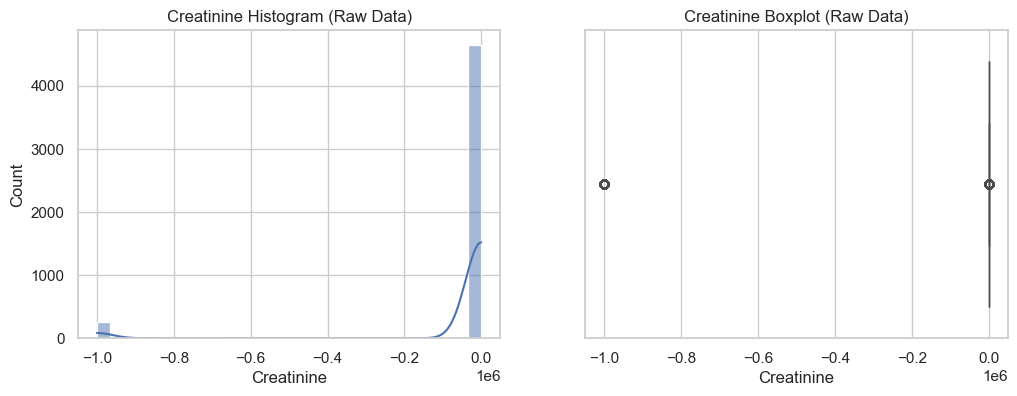

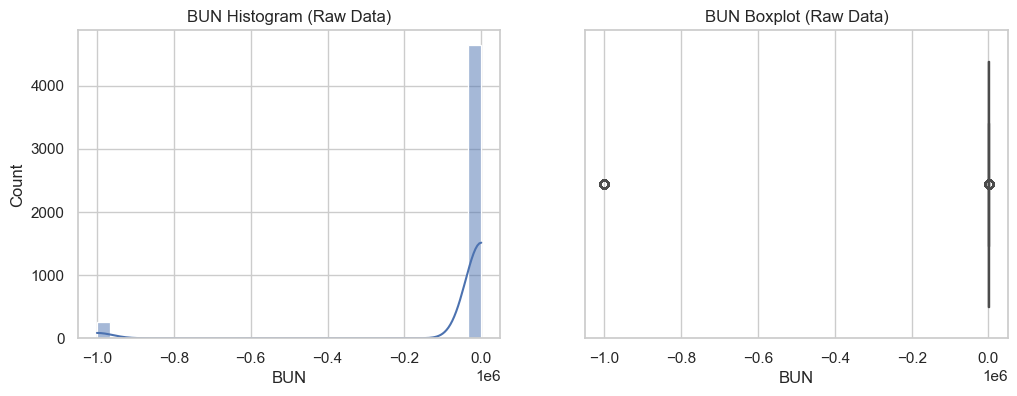

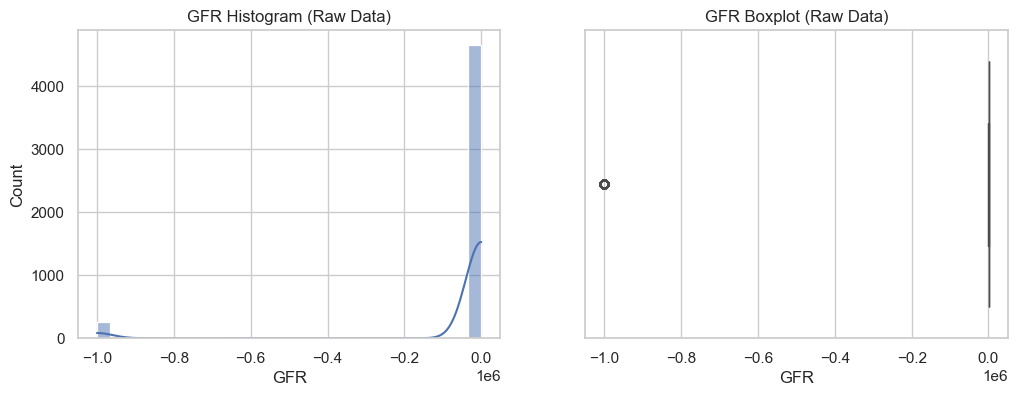

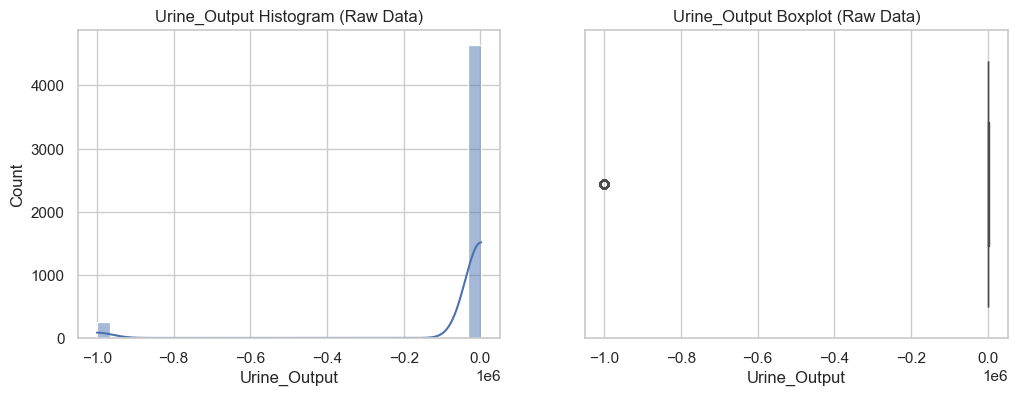

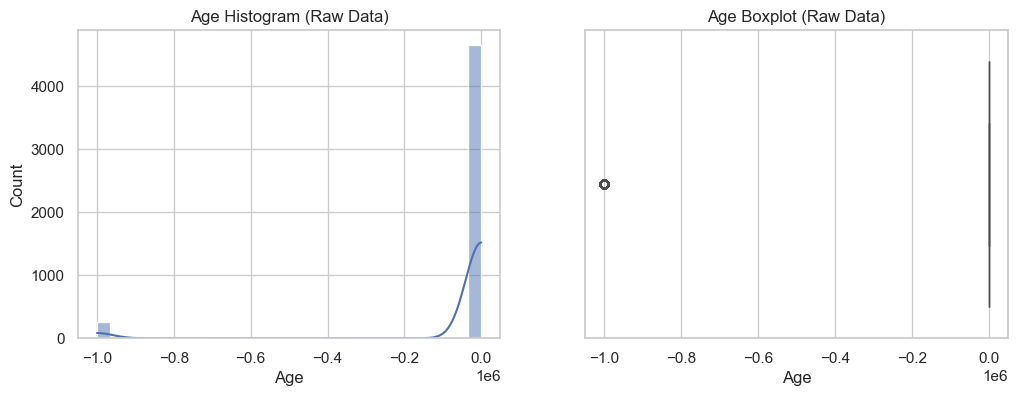

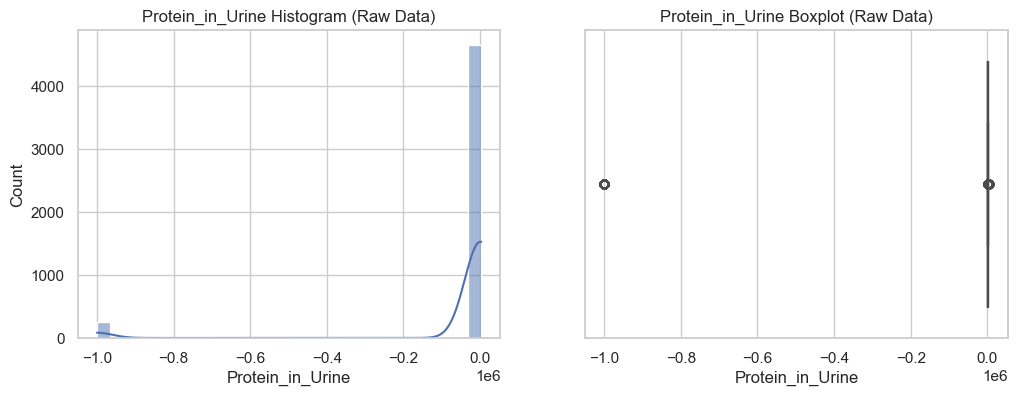

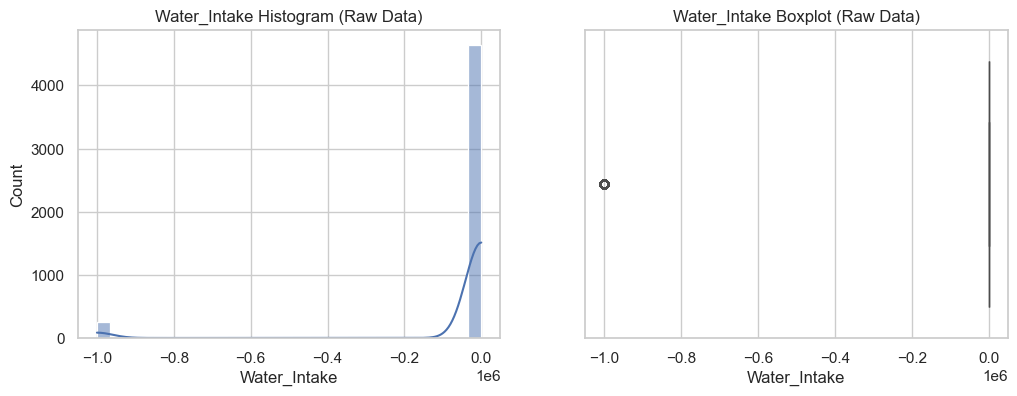

In [486]:
numeric_cols = [
    'Creatinine', 'BUN', 'GFR', 'Urine_Output', 'Age',
    'Protein_in_Urine', 'Water_Intake'
]

# =========================
# Before Cleaning
# =========================
print("Feature distributions BEFORE cleaning:")

for col in numeric_cols:
    plt.figure(figsize=(12,4))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'{col} Histogram (Raw Data)')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot (Raw Data)')
    
    plt.show()

#  dataset shape Before Cleaning

In [490]:
print(" dataset shape:", df.shape)

print("\nDiabetes distribution:")
print(df['Diabetes'].value_counts())

print("\nHypertension distribution:")
print(df['Hypertension'].value_counts())

print("\nTarget distribution:")
print(df['CKD_Status'].value_counts())

 dataset shape: (5150, 12)

Diabetes distribution:
Diabetes
 0.0         3312
 1.0         1348
-999999.0     252
Name: count, dtype: int64

Hypertension distribution:
Hypertension
 0.0         2895
 1.0         1756
-999999.0     256
Name: count, dtype: int64

Target distribution:
CKD_Status
 0.0         3451
 1.0         1200
-999999.0     256
Name: count, dtype: int64


# Target the cleaning data

In [208]:
# =========================
# Target Cleaning
# =========================
print("\nTarget distribution before cleaning:")
print(df['CKD_Status'].value_counts(dropna=False))

df = df[df['CKD_Status'].notna() & (df['CKD_Status'] != -9999999)]

print("\nAfter removing invalid target values:")
print(df.shape)



Target distribution before cleaning:
CKD_Status
 0.0         3451
 1.0         1200
-999999.0     256
 NaN          243
Name: count, dtype: int64

After removing invalid target values:
(4907, 11)


# Encode Medication

In [360]:
# =========================
# Encode Medication
# =========================
medication_mapping = {
    'ACE Inhibitor': 0,
    'ARB': 1,
    'Diuretic': 2,
    'dirty_value': 3
}

df['Medication_encoded'] = df['Medication'].map(medication_mapping)
encoded_categorical.append('Medication_encoded')

# Outlier Handling (IQR)

In [ ]:
def replace_outliers_iqr_with_nan(df, cols):
    clean = df.copy()
    for col in cols:
        Q1 = clean[col].quantile(0.25)
        Q3 = clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        clean.loc[
            (clean[col] < lower) | (clean[col] > upper),
            col
        ] = np.nan
    return clean


df_no_outliers = replace_outliers_iqr_with_nan(df, continuous)

print("\nOutliers replaced with NaN:")
for col in continuous:
    n_outliers = df[col].shape[0] - df_no_outliers[col].count()
    print(f"{col}: {n_outliers}")


Outliers replaced with NaN:
Creatinine: 1416
BUN: 1224
GFR: 499
Urine_Output: 504
Age: 501
Protein_in_Urine: 1439
Water_Intake: 504


# Fix Dirty Encoded Values

In [362]:
# =========================
# Fix Dirty Encoded Values
# =========================
cols_to_fix = ['Diabetes', 'Hypertension', 'CKD_Status']
df_no_outliers[cols_to_fix] = df_no_outliers[cols_to_fix].replace(-999999, np.nan)

df_no_outliers = df_no_outliers.dropna(subset=['CKD_Status'])



In [341]:
# =========================
# Missing Value Imputation
# =========================
target = 'CKD_Status'
df_filled = df_no_outliers.copy()

# Continuous → class mean
for col in continuous:
    for cls in [0, 1]:
        mean_val = df_filled.loc[df_filled[target] == cls, col].mean()
        df_filled.loc[
            (df_filled[target] == cls) & (df_filled[col].isna()),
            col
        ] = mean_val

# Replace the missing Continuous Values → mean and the Categorical → the mode

In [ ]:
target = 'CKD_Status'
df_filled = df_no_outliers.copy()

for col in continuous:
    for cls in [0, 1]:
        mean_val = df_filled.loc[df_filled[target] == cls, col].mean()
        df_filled.loc[
            (df_filled[target] == cls) & (df_filled[col].isna()),
            col
        ] = mean_val

for col in encoded_categorical:
    if col == target:
        continue
    for cls in [0, 1]:
        mode_val = df_filled.loc[df_filled[target] == cls, col].mode()
        if not mode_val.empty:
            df_filled.loc[
                (df_filled[target] == cls) & (df_filled[col].isna()),
                col
            ] = mode_val.iloc[0]

In [368]:
# =========================
# Final Cleanup
# =========================
df_filled.drop(columns=['Medication'], inplace=True)
df_filled.dropna(inplace=True)

print("\nFinal dataset shape:", df_filled.shape)

print("\nDiabetes distribution:")
print(df_filled['Diabetes'].value_counts())

print("\nHypertension distribution:")
print(df_filled['Hypertension'].value_counts())

print("\nTarget distribution:")
print(df_filled['CKD_Status'].value_counts())



Final dataset shape: (4651, 11)

Diabetes distribution:
Diabetes
0.0    3432
1.0    1219
Name: count, dtype: int64

Hypertension distribution:
Hypertension
0.0    3045
1.0    1606
Name: count, dtype: int64

Target distribution:
CKD_Status
0.0    3451
1.0    1200
Name: count, dtype: int64


# Discribe the data after cleaning

In [369]:
# =========================
# Feature / Target Split
# =========================
X = df_filled.drop(columns=['CKD_Status'])
y = df_filled['CKD_Status']

# 60% Train & 20% Test & 20% split the data + shuffle 

In [370]:
# 60% train, 20% val, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Convert to correct shape
X_train_T = X_train.values.T
y_train_T = y_train.values.reshape(1, -1)
X_val_T = X_val.values.T
y_val_T = y_val.values.reshape(1, -1)
X_test_T = X_test.values.T
y_test_T = y_test.values.reshape(1, -1)

# Normlization 

In [445]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
features = ['Creatinine', 'BUN', 'GFR', 'Urine_Output', 'Age', 
            'Protein_in_Urine', 'Water_Intake']

# Initialize scaler
scaler = MinMaxScaler()

# Fit on your features and transform
df_filled[features] = scaler.fit_transform(df_filled[features])

# Check the result
print(df_filled.head())

   Creatinine       BUN       GFR  Urine_Output  Diabetes  Hypertension  \
0    0.064578  0.113222  0.967251      0.749258       0.0           0.0   
1    0.708117  0.694866  0.448687      0.254848       1.0           0.0   
2    0.016286  0.007283  0.840723      0.654486       1.0           1.0   
3    0.066872  0.087445  0.944458      0.933631       0.0           0.0   
4    0.092018  0.203938  0.859077      0.756035       0.0           1.0   

        Age  Protein_in_Urine  Water_Intake  CKD_Status  Medication_encoded  
0  0.134473          0.056108      0.190029         0.0                 0.0  
1  0.210031          0.356303      0.808905         1.0                 0.0  
2  0.525448          0.072574      0.040868         0.0                 2.0  
3  0.443952          0.055550      0.503292         0.0                 0.0  
4  0.676243          0.005600      0.391751         0.0                 1.0  


In [446]:
df_filled.head()

,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,CKD_Status,Medication_encoded
0,0.064578,0.113222,0.967251,0.749258,0.0,0.0,0.134473,0.056108,0.190029,0.0,0.0
1,0.708117,0.694866,0.448687,0.254848,1.0,0.0,0.210031,0.356303,0.808905,1.0,0.0
2,0.016286,0.007283,0.840723,0.654486,1.0,1.0,0.525448,0.072574,0.040868,0.0,2.0
3,0.066872,0.087445,0.944458,0.933631,0.0,0.0,0.443952,0.055550,0.503292,0.0,0.0
4,0.092018,0.203938,0.859077,0.756035,0.0,1.0,0.676243,0.005600,0.391751,0.0,1.0


# Discribe the data after cleaning

In [483]:
df_filled.describe()

,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,CKD_Status,Medication_encoded
count,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000,4651.000000
mean,0.264794,0.263291,0.682610,0.606201,0.262094,0.345302,0.443381,0.200138,0.500560,0.258009,0.379058
std,0.273766,0.272651,0.314628,0.281162,0.439821,0.475518,0.190694,0.257752,0.274750,0.437586,0.788454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.077650,0.075619,0.496665,0.339702,0.000000,0.000000,0.323121,0.036929,0.273014,0.000000,0.000000
50%,0.134883,0.133380,0.847571,0.695250,0.000000,0.000000,0.443952,0.063806,0.503292,0.000000,0.000000
75%,0.514239,0.510521,0.881529,0.819032,1.000000,1.000000,0.563441,0.405241,0.728628,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


# Feature distributions AFTER cleaning

Feature distributions AFTER cleaning:


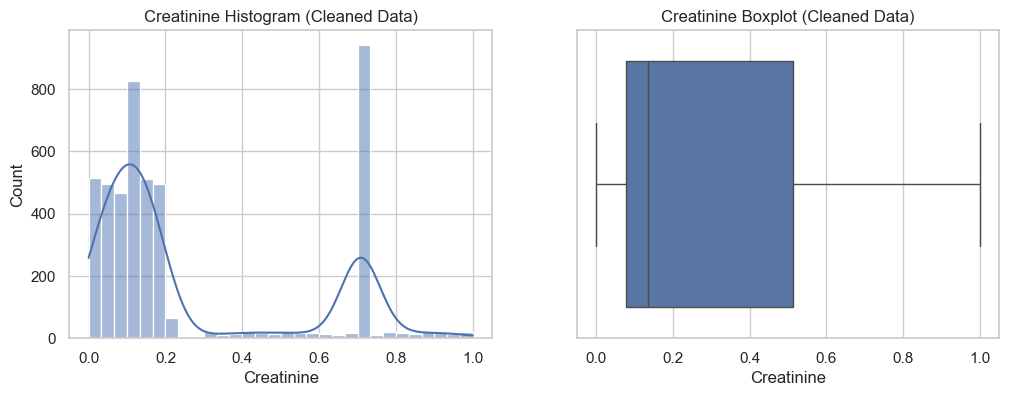

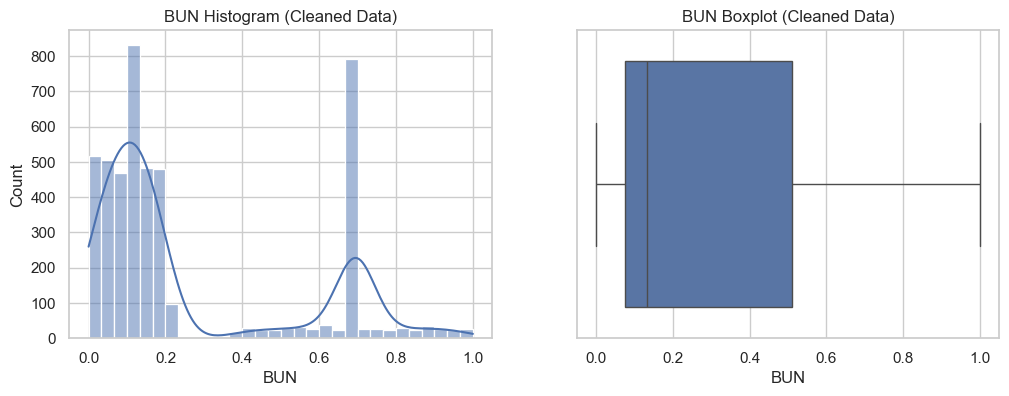

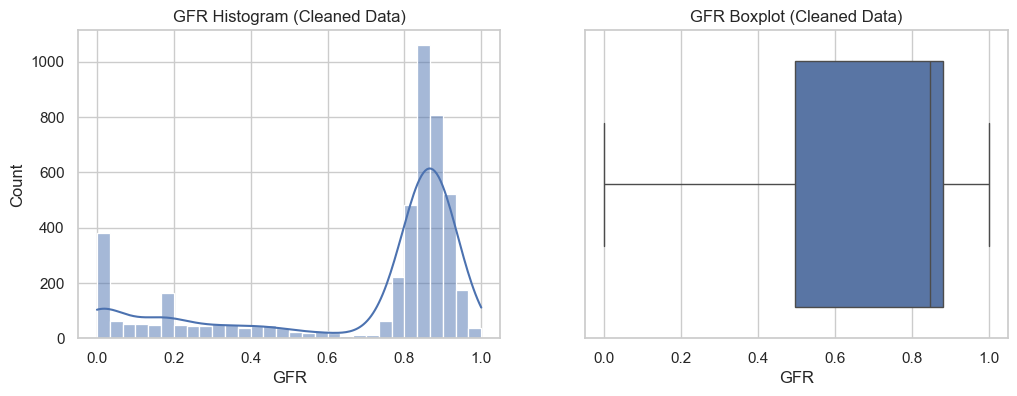

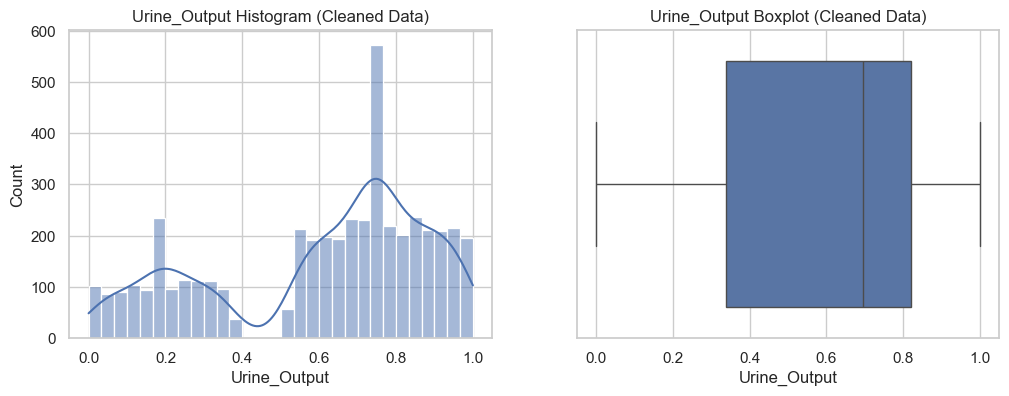

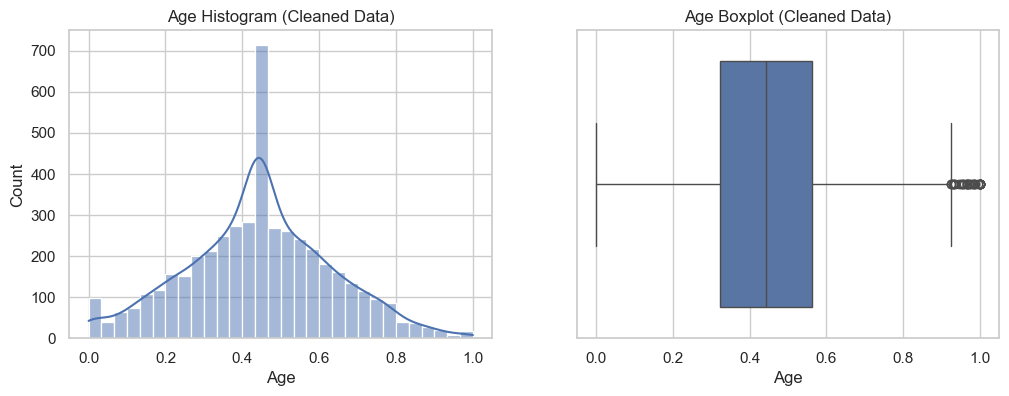

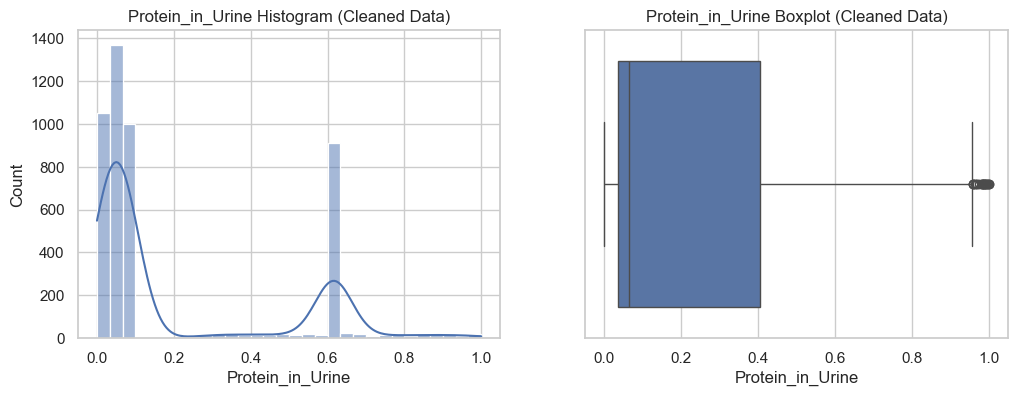

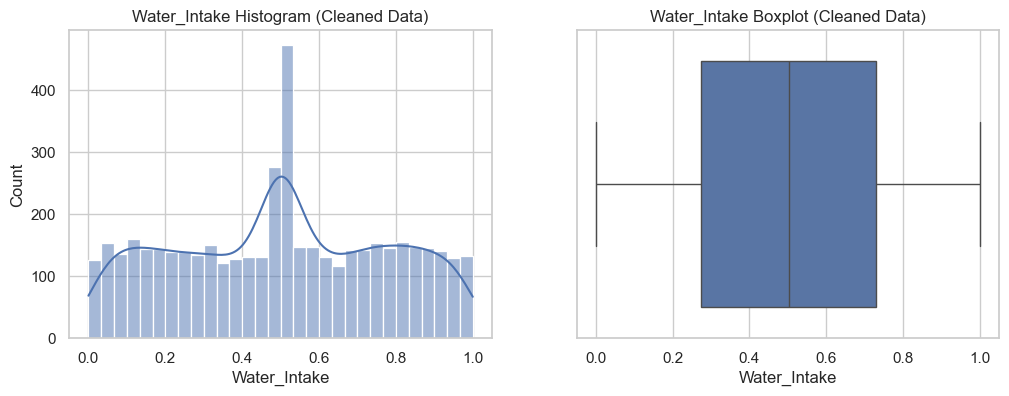

In [488]:
print("Feature distributions AFTER cleaning:")

for col in numeric_cols:
    plt.figure(figsize=(12,4))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df_filled[col], bins=30, kde=True)
    plt.title(f'{col} Histogram (Cleaned Data)')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df_filled[col])
    plt.title(f'{col} Boxplot (Cleaned Data)')
    
    plt.show()

# Initialize_parameters for Neural Network 

In [447]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)

    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))

    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))

    return W1, b1, W2, b2


# Activation Functions

In [448]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

# Forward_Propagation For the Neural Network

In [449]:
def forward_propagation(X, W1, b1, W2, b2, keep_prob=1.0):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    
    # Dropout
    if keep_prob < 1.0:
        D1 = (np.random.rand(*A1.shape) < keep_prob) / keep_prob
        A1 *= D1
    else:
        D1 = np.ones_like(A1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = (X, Z1, A1, D1, W1, b1, Z2, A2, W2, b2)
    return A2, cache

# Compute The Loss 

In [450]:
def compute_loss(y, y_hat, W1, W2, lambda_reg):
    m = y.shape[1]
    eps = 1e-8
    bce = -(1/m) * np.sum(y*np.log(y_hat+eps) + (1-y)*np.log(1-y_hat+eps))
    reg = (lambda_reg / (2*m)) * (np.sum(W1**2) + np.sum(W2**2))
    return bce + reg

# backpropagation 

In [451]:
def backpropagation(cache, y, lambda_reg):
    X, Z1, A1, D1, W1, b1, Z2, A2, W2, b2 = cache
    m = y.shape[1]
    
    # Output layer
    dZ2 = A2 - y
    dW2 = (1/m) * np.dot(dZ2, A1.T) + (lambda_reg/m) * W2
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    
    # Hidden layer
    dA1 = np.dot(W2.T, dZ2)
    dA1 *= D1  # Apply dropout mask
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1/m) * np.dot(dZ1, X.T) + (lambda_reg/m) * W1
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2

# Update_Parameters

In [452]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Training Loop 

In [453]:
# =========================
# Training
# =========================
input_size = X_train_T.shape[0]
hidden_size = 16
output_size = 1
epochs = 1000
learning_rate = 0.00001
lambda_reg = 0.0001
keep_prob = 0.9  # dropout rate
patience = 20  # early stopping patience

W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
losses = []
val_losses = []
best_val_loss = float('inf')
counter = 0

for epoch in range(epochs):
    # Forward + dropout
    A2, cache = forward_propagation(X_train_T, W1, b1, W2, b2, keep_prob=keep_prob)
    loss = compute_loss(y_train_T, A2, W1, W2, lambda_reg)
    
    # Backprop
    dW1, db1, dW2, db2 = backpropagation(cache, y_train_T, lambda_reg)
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    losses.append(loss)
    
    # Validation loss
    A2_val, _ = forward_propagation(X_val_T, W1, b1, W2, b2, keep_prob=1.0)
    val_loss = compute_loss(y_val_T, A2_val, W1, W2, lambda_reg)
    val_losses.append(val_loss)
    
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        best_params = (W1.copy(), b1.copy(), W2.copy(), b2.copy())
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            W1, b1, W2, b2 = best_params
            break
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Train Loss: {loss:.4f} | Val Loss: {val_loss:.4f}")

Epoch 0 | Train Loss: 0.6924 | Val Loss: 0.6799
Epoch 100 | Train Loss: 0.4247 | Val Loss: 0.4082
Epoch 200 | Train Loss: 0.3800 | Val Loss: 0.3586
Epoch 300 | Train Loss: 0.3583 | Val Loss: 0.3343
Epoch 400 | Train Loss: 0.3377 | Val Loss: 0.3138
Epoch 500 | Train Loss: 0.3173 | Val Loss: 0.2942
Epoch 600 | Train Loss: 0.3005 | Val Loss: 0.2749
Epoch 700 | Train Loss: 0.2812 | Val Loss: 0.2558
Epoch 800 | Train Loss: 0.2643 | Val Loss: 0.2373
Epoch 900 | Train Loss: 0.2492 | Val Loss: 0.2194


# Loss Curve Plot

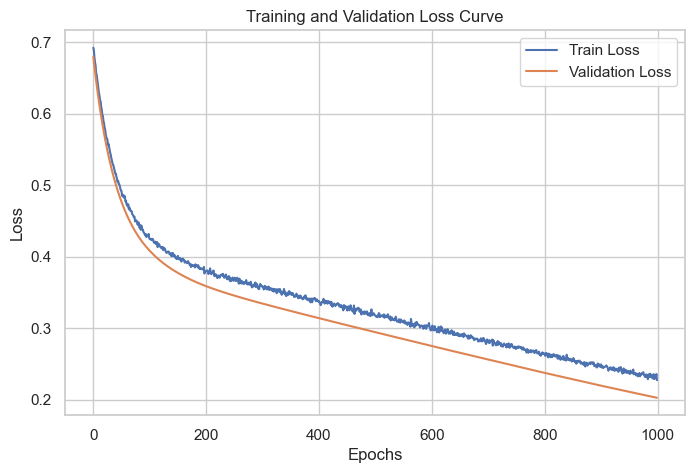

In [454]:
plt.figure(figsize=(8,5))
plt.plot(losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

# Testing the Accuracy

In [455]:
A2_test, _ = forward_propagation(X_test_T, W1, b1, W2, b2, keep_prob=1.0)
y_pred = (A2_test > 0.5).astype(int).flatten()
accuracy = np.mean(y_pred == y_test_T.flatten())
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9227


In [456]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9226638023630505
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       686
         1.0       0.98      0.72      0.83       245

    accuracy                           0.92       931
   macro avg       0.94      0.86      0.89       931
weighted avg       0.93      0.92      0.92       931



In [457]:
print("Predictions:", y_pred[:10])
print("True Labels:", y_test.values[:10])


Predictions: [1 0 0 0 0 0 0 0 0 0]
True Labels: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Model Evaluation

In [459]:
# =========================
# Model Evaluation (Test Set)
# =========================

# Forward pass (NO dropout during evaluation)
A2_test, _ = forward_propagation(
    X_test_T, W1, b1, W2, b2, keep_prob=1.0
)

# Convert probabilities to class labels
y_pred_test = (A2_test >= 0.5).astype(int)


In [461]:
TP = np.sum((y_pred_test == 1) & (y_test_T == 1))
TN = np.sum((y_pred_test == 0) & (y_test_T == 0))
FP = np.sum((y_pred_test == 1) & (y_test_T == 0))
FN = np.sum((y_pred_test == 0) & (y_test_T == 1))

precision = TP / (TP + FP + 1e-8)
recall = TP / (TP + FN + 1e-8)
f1_score = 2 * (precision * recall) / (precision + recall + 1e-8)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Precision: 0.9779005524321601
Recall: 0.722448979562349
F1 Score: 0.8309859105667967


# confusion_matrix

In [462]:
confusion_matrix = np.array([
    [TN, FP],
    [FN, TP]
])

print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[682   4]
 [ 68 177]]


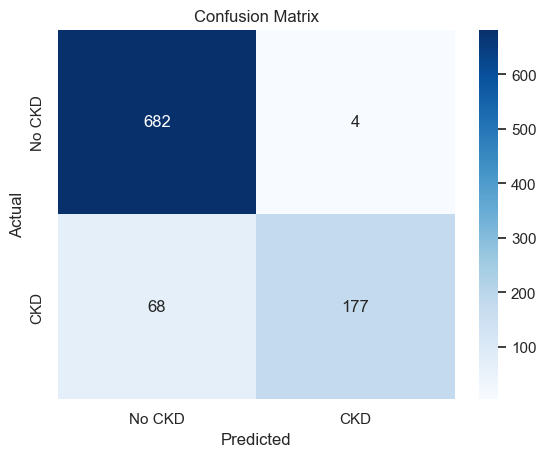

In [463]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No CKD", "CKD"],
    yticklabels=["No CKD", "CKD"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Model Testing

In [491]:
# Compare first 10 predictions
for i in range(10):
    print(
        f"Sample {i+1}: "
        f"True Label = {y_test_T[0, i]}, "
        f"Predicted = {y_pred_test[0, i]}, "
        f"Probability = {A2_test[0, i]:.4f}"
    )


Sample 1: True Label = 1.0, Predicted = 1, Probability = 0.5158
Sample 2: True Label = 0.0, Predicted = 0, Probability = 0.0390
Sample 3: True Label = 0.0, Predicted = 0, Probability = 0.1027
Sample 4: True Label = 0.0, Predicted = 0, Probability = 0.0482
Sample 5: True Label = 0.0, Predicted = 0, Probability = 0.0680
Sample 6: True Label = 0.0, Predicted = 0, Probability = 0.0607
Sample 7: True Label = 0.0, Predicted = 0, Probability = 0.0797
Sample 8: True Label = 0.0, Predicted = 0, Probability = 0.0591
Sample 9: True Label = 0.0, Predicted = 0, Probability = 0.0786
Sample 10: True Label = 0.0, Predicted = 0, Probability = 0.0860


In [466]:
accuracy = np.mean(y_pred_test == y_test_T)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.9226638023630505


# Hyperparameter 

In [467]:
def train_evaluate(X_train_T, y_train_T, X_val_T, y_val_T,
                   hidden_size=16, hidden_layers=1,
                   learning_rate=0.00001, activation='relu',
                   epochs=500, lambda_reg=0.0001, keep_prob=1.0):
    
    # Initialize weights
    input_size = X_train_T.shape[0]
    output_size = 1
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    
    # Select activation
    act_func = relu if activation=='relu' else np.tanh
    act_deriv = relu_derivative if activation=='relu' else lambda Z: 1 - np.tanh(Z)**2
    
    losses = []
    val_losses = []
    
    for epoch in range(epochs):
        # Forward pass
        A2, cache = forward_propagation(X_train_T, W1, b1, W2, b2, keep_prob)
        loss = compute_loss(y_train_T, A2, W1, W2, lambda_reg)
        
        # Backprop
        dW1, db1, dW2, db2 = backpropagation(cache, y_train_T, lambda_reg)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
        # Validation
        A2_val, _ = forward_propagation(X_val_T, W1, b1, W2, b2, keep_prob=1.0)
        val_loss = compute_loss(y_val_T, A2_val, W1, W2, lambda_reg)
        
        losses.append(loss)
        val_losses.append(val_loss)
    
    # Final validation accuracy
    y_pred_val = (A2_val >= 0.5).astype(int)
    val_acc = np.mean(y_pred_val == y_val_T)
    
    return val_acc, losses, val_losses


In [468]:
hidden_sizes = [8, 16, 32]
learning_rates = [1e-3, 1e-4, 1e-5]
activations = ['relu', 'tanh']

results = []

for h in hidden_sizes:
    for lr in learning_rates:
        for act in activations:
            val_acc, losses, val_losses = train_evaluate(
                X_train_T, y_train_T, X_val_T, y_val_T,
                hidden_size=h, learning_rate=lr, activation=act,
                epochs=300
            )
            results.append({
                'hidden': h,
                'lr': lr,
                'activation': act,
                'val_acc': val_acc,
                'losses': losses,
                'val_losses': val_losses
            })
            print(f"Hidden={h}, LR={lr}, Activation={act}, Val Acc={val_acc:.4f}")


Hidden=8, LR=0.001, Activation=relu, Val Acc=0.9925
Hidden=8, LR=0.001, Activation=tanh, Val Acc=0.9925
Hidden=8, LR=0.0001, Activation=relu, Val Acc=0.9914
Hidden=8, LR=0.0001, Activation=tanh, Val Acc=0.9914
Hidden=8, LR=1e-05, Activation=relu, Val Acc=0.7505
Hidden=8, LR=1e-05, Activation=tanh, Val Acc=0.7505
Hidden=16, LR=0.001, Activation=relu, Val Acc=0.9925
Hidden=16, LR=0.001, Activation=tanh, Val Acc=0.9925
Hidden=16, LR=0.0001, Activation=relu, Val Acc=0.9925
Hidden=16, LR=0.0001, Activation=tanh, Val Acc=0.9925
Hidden=16, LR=1e-05, Activation=relu, Val Acc=0.7538
Hidden=16, LR=1e-05, Activation=tanh, Val Acc=0.7538
Hidden=32, LR=0.001, Activation=relu, Val Acc=0.9925
Hidden=32, LR=0.001, Activation=tanh, Val Acc=0.9925
Hidden=32, LR=0.0001, Activation=relu, Val Acc=0.9925
Hidden=32, LR=0.0001, Activation=tanh, Val Acc=0.9925
Hidden=32, LR=1e-05, Activation=relu, Val Acc=0.7505
Hidden=32, LR=1e-05, Activation=tanh, Val Acc=0.7505


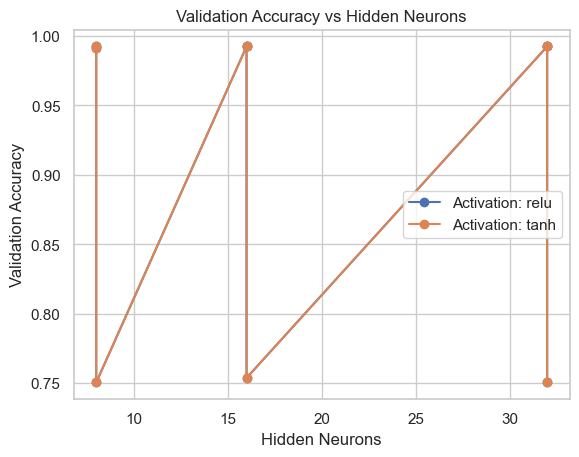

In [469]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

for act in activations:
    subset = [r for r in results if r['activation']==act]
    neurons = [r['hidden'] for r in subset]
    val_accs = [r['val_acc'] for r in subset]
    
    plt.plot(neurons, val_accs, marker='o', label=f'Activation: {act}')

plt.xlabel('Hidden Neurons')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Hidden Neurons')
plt.legend()
plt.show()


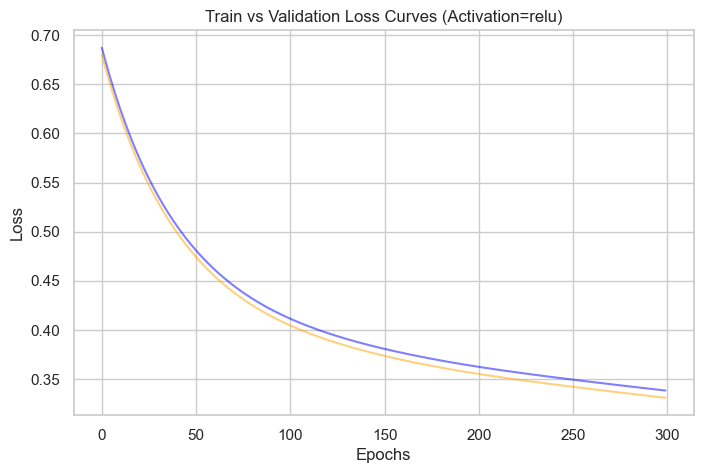

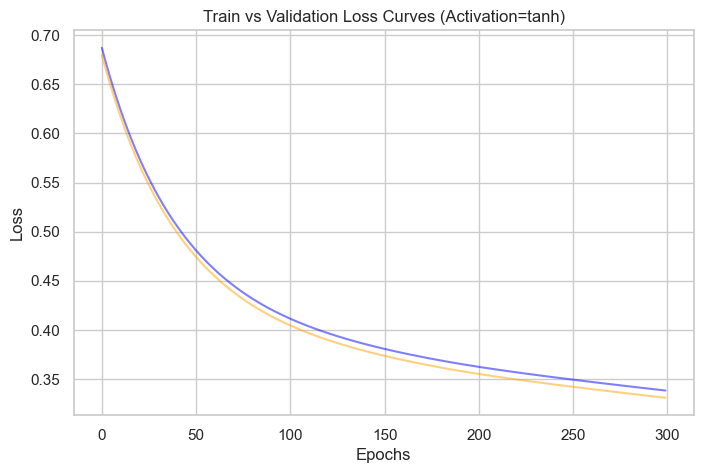

In [472]:
for act in activations:
    subset = [r for r in results if r['activation']==act and r['hidden']==16 and r['lr']==1e-5]
    plt.figure(figsize=(8,5))
    for r in subset:
        plt.plot(r['losses'], label='Train Loss', color='blue', alpha=0.5)
        plt.plot(r['val_losses'], label='Validation Loss', color='orange', alpha=0.5)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Train vs Validation Loss Curves (Activation={act})')
    plt.show()



Plotting categorical columns: ['Hypertension', 'Diabetes', 'Medication_encoded']


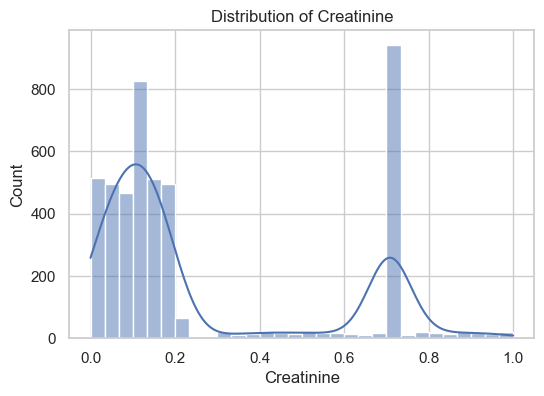

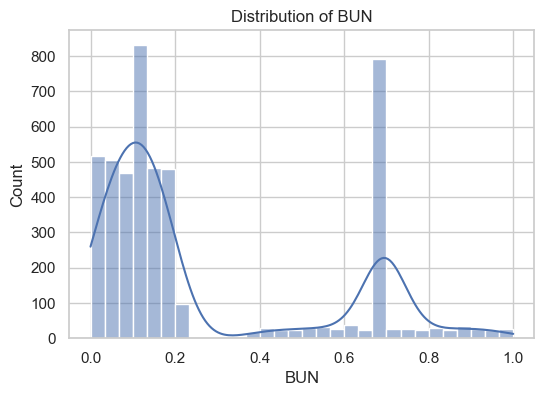

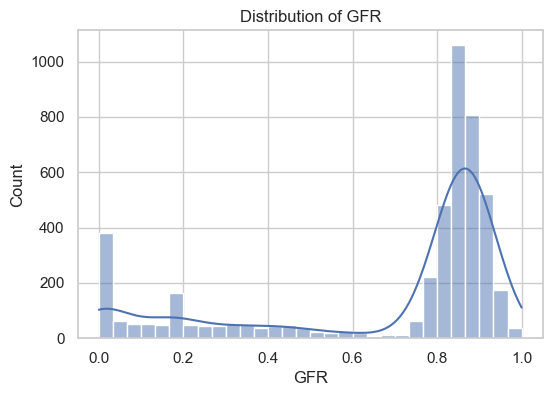

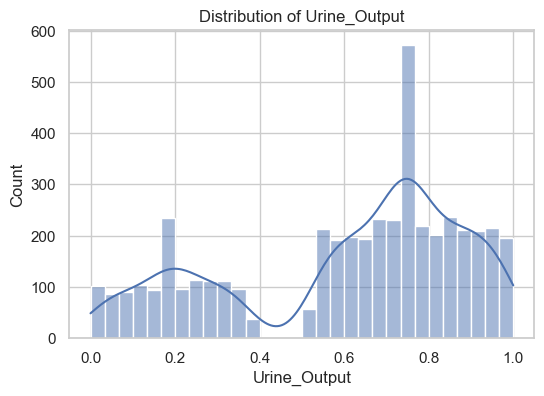

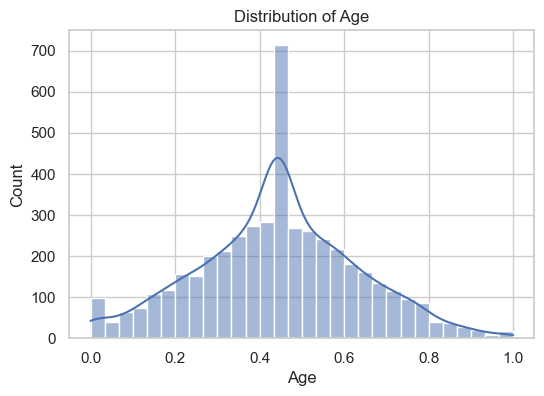

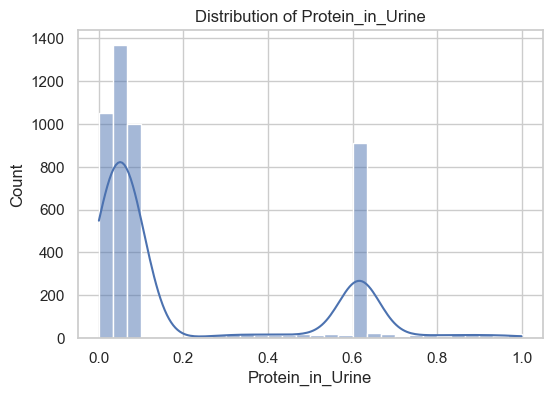

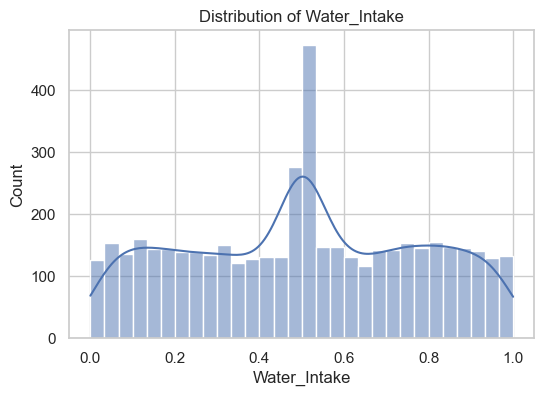

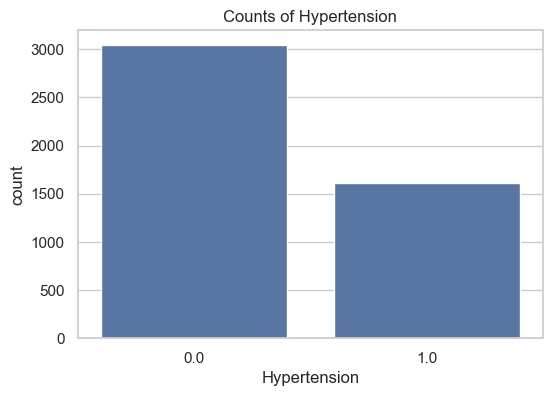

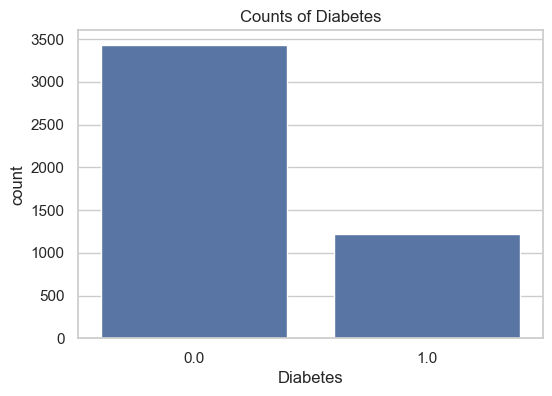

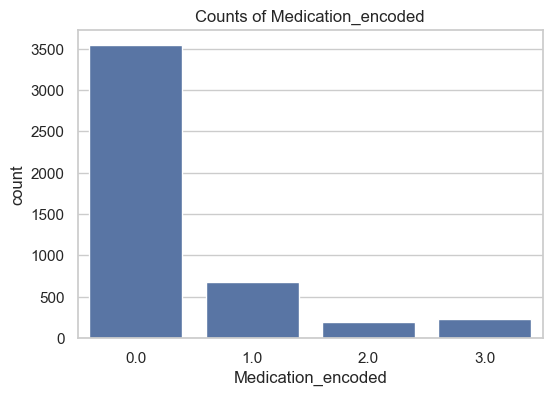

In [475]:
# Note: 'Medication' was dropped during cleaning; use 'Medication_encoded' if present.
continuous = ['Creatinine', 'BUN', 'GFR', 'Urine_Output', 'Age', 'Protein_in_Urine', 'Water_Intake']

# build categorical list only from columns that actually exist in df_filled
categorical = [c for c in ['Hypertension', 'Diabetes', 'Medication', 'Medication_encoded'] if c in df_filled.columns]

print(f"Plotting categorical columns: {categorical}")

# Continuous features
for col in continuous:
    if col in df_filled.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df_filled[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.show()
    else:
        print(f"Skipping {col}: column not found in df_filled")

# Categorical features
for col in categorical:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df_filled)
    plt.title(f'Counts of {col}')
    plt.show()